In [1]:
import yfinance as yf
import pandas as pd 
import aiohttp
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
def warn(*arg , **kwarg):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore" , category = FutureWarning)

In [4]:
#Define graph Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
#using YFINANCE to extract Stock Data (TESLA)

In [36]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = "max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,174.779999,177.759995,174.000000,174.770004,60056300,0.0,0.0
2024-06-05 00:00:00-04:00,175.350006,176.149994,172.130005,175.000000,57953800,0.0,0.0
2024-06-06 00:00:00-04:00,174.600006,179.729996,172.729996,177.940002,69887000,0.0,0.0


In [40]:
tesla_data = tesla_data.reset_index()

In [44]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
#Using Web scraping to extract Tesla Revenue Deta

In [45]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [46]:
#send an HTTP request to retrieve data
async with aiohttp.ClientSession() as session:
    async with session.get(url) as response:
        response.raise_for_status() #rasie an error if the session failed
        content = await response.read()
        soup = BeautifulSoup(content ,"html.parser")
        print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

In [ ]:
#retrieving Tesla Quaretely Revenue

In [71]:
#searching for the table index
tables = soup.find_all("table")
tables_index = None
for index , table in enumerate(tables) :
    if ("Tesla Quarterly Revenue" in str(table)) :
        table_index = index
if table_index is not None :
    print(table_index)
else :
    print("table not found")

1


In [73]:
table =tables[1]
print(table.prettify())

<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-03-31
   </td>
   <td style="text-align:center">
    $18,756
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-12-31
   </td>
   <td style="text-align:center">
    $17,719
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-09-30
   </td>
   <td style="text-align:center">
    $13,757
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2021-06-30
   </td>
   <td style="text-align:center">
    $11,95

In [83]:
#store the the table into a data frame 
--first methode--
    #tesla_revenue = pd.read_html(str(soup))[1]
    #tesla_revenue.columns =["Date","Revenue"]
    
columns = ["Date" , "Revenue"]
data=[]
for row in table.tbody.find_all("tr"):
    col = row.find_all("td")
    if col!=[]:
        if len(col) == 2:
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            data.append({"Date":date , "Revenue":revenue})
            
tesla_revenue = pd.DataFrame(data , columns = columns)

In [129]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [86]:
tesla_revenue_v2 = tesla_revenue.copy()

In [115]:
#Remove $ and , in the "Revenue" column
tesla_revenue_v2["Revenue"] = tesla_revenue_v2["Revenue"].str.replace("$","").str.replace(",","")

In [139]:
#Convert the "Revenue" column to numerical value and the "Date" column to datetime value
tesla_revenue_v2["Revenue"] = pd.to_numeric(tesla_revenue_v2["Revenue"] , downcast="integer")
tesla_revenue_v2["Date"] = pd.to_datetime(tesla_revenue_v2["Date"])

In [134]:
#Remove null values
tesla_revenue_v2.dropna(inplace=True)
tesla_revenue_v2 = tesla_revenue_v2[tesla_revenue_v2['Revenue'] != ""]

In [140]:
tesla_revenue_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     53 non-null     datetime64[ns]
 1   Revenue  53 non-null     int16         
dtypes: datetime64[ns](1), int16(1)
memory usage: 954.0 bytes


In [141]:
tesla_revenue_v2.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
#using YFINANCE to extract Stock Data (GameStop)

In [142]:
game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period = "max").reset_index()
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [ ]:
#retrieving GameStop Quaretely Revenue

In [143]:
import requests

In [144]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data1 = requests.get(url).text 

In [145]:
soup1 = BeautifulSoup(html_data1 , 'html.parser')

In [146]:
gme_revenue = pd.read_html(str(soup1))[1]
gme_revenue.columns = ["Date" , "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$","").str.replace(",","")

In [147]:
gme_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,NaN
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
#plotting Tesla Stock Graph¶

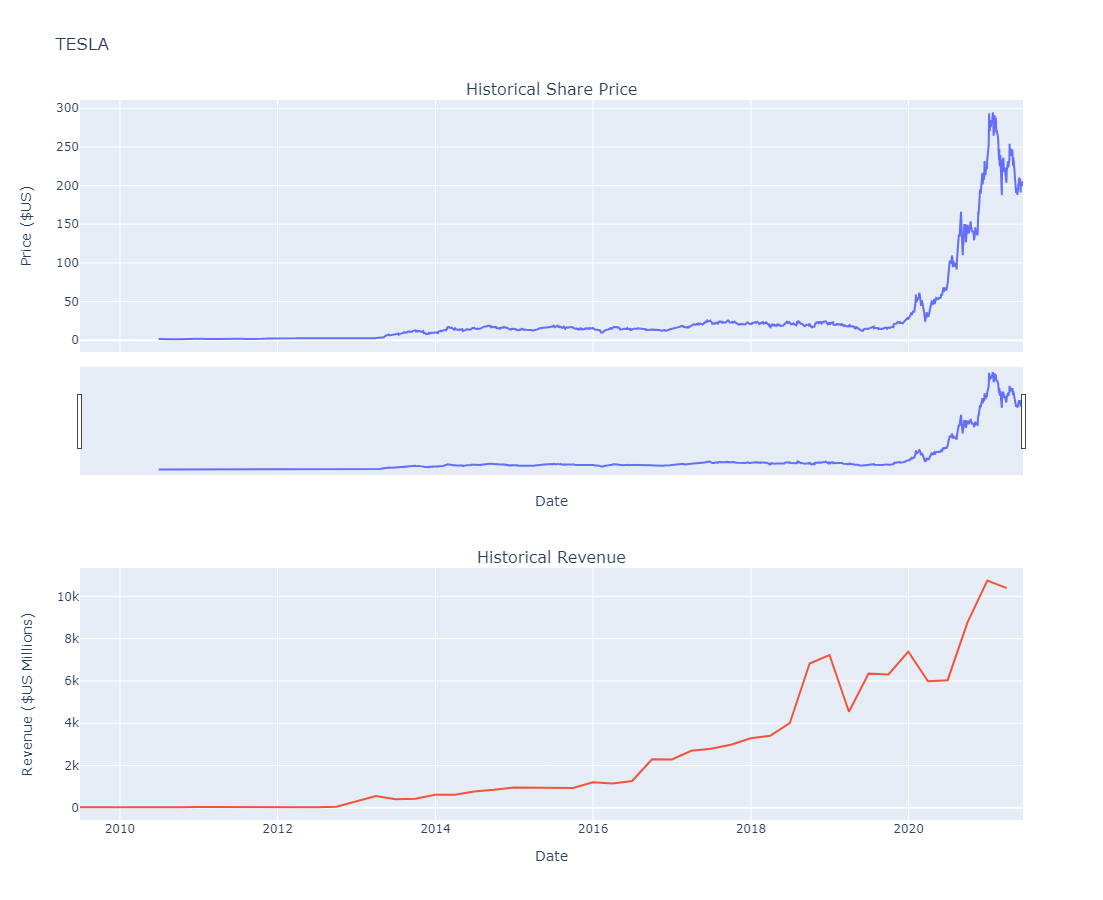

In [151]:
make_graph(tesla_data , tesla_revenue_v2 , 'TESLA')

In [ ]:
#Plotting GameStop Stock Graph

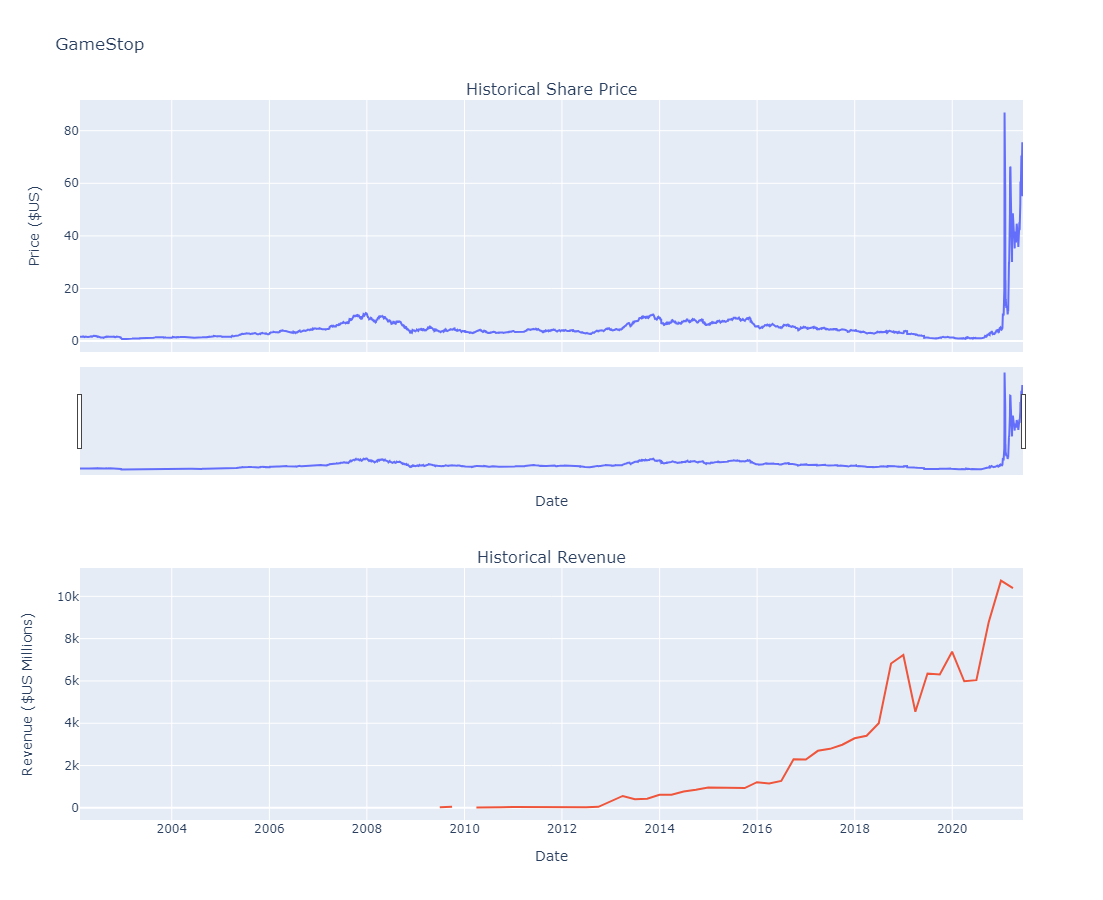

In [152]:
make_graph(gme_data , gme_revenue ,'GameStop')